# AdaBoost模型

## AdaBoost模型思想

AdaBoost（全称：Adaptive Boosting）是一种Boosting算法，通过迭代式地训练多个弱分类器（weak learners）来构建一个强分类器。

AdaBoost的核心思想可以被归纳为以下两点：
- 将模型关注点放在被错误分类的样本上。在迭代训练过程中，减少上一轮被正确分类的样本权重，提高被错误分类的样本权重。
- 构建强分类器的时候采用加权投票的方法，分类误差小的弱分类器权重大，分类误差大的弱分类器权重小。

## AdaBoost模型流程

1. **初始化样本权重**：
   - 将所有数据样本的初始权重设置为相等：
     $$w_i^{(1)} = \frac{1}{N} \quad \text{对于所有 } i = 1, 2, \dots, N$$

2. **训练$T$个弱分类器**：
    对每一轮$t = 1, 2, \dots, T$，执行以下步骤：
    1. **使用当前权重训练弱分类器**：
        - 使用当前的样本权重$w_i^{(t)}$训练一个弱分类器$h_t(x)$，使其尽量减少加权错误率。
    2. **计算分类误差**：
        - 计算$h_t(x)$的加权错误率：
          $$\epsilon_t = \sum_{i=1}^{N} w_i^{(t)} \cdot \mathbf{1}(h_t(x_i) \neq y_i)$$
          其中，$\mathbf{1}$是指示函数，当$h_t(x_i) \neq y_i$时取值为 1，否则为 0。
    3. **计算弱分类器权重**：
        - 根据加权错误率计算弱分类器的$h_t(x)$的权重$\alpha_t$：
          $$\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$$
        - 保证分类误差小的弱分类器的权重大
        - 分类误差大的弱分类器权重小
    4. **更新样本权重**：
        - 更新每个样本的权重：
          $$w_i^{(t+1)} = \frac{w_i^{(t)} \cdot e^{-\alpha_t \cdot y_i \cdot h_t(x_i)}}{Z_t}$$
          - 其中，$Z_t$是归一化因子，用于确保权重之和为 1。
          - 保证对分类正确的样本，权重减小；
          - 对分类错误的样本，权重增大。

3. **组合弱分类器**：
   - 训练完成后，组合所有弱分类器，形成最终的强分类器：
     $$H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t \cdot h_t(x)\right)$$
     其中 $\alpha_t$ 是每个弱分类器的权重，$h_t(x)$ 是第 $t$ 轮的弱分类器。


## AdaBoost模型优缺点

### AdaBoost模型优点

- **关注错误样本**：自动调整样本权重，使得分类器能够专注于被错误分类的样本，从而不断提升性能
- **可以使用多种弱分类器**：AdaBoost不依赖特定的弱分类器，可以结合多种分类器（如决策树、朴素贝叶斯等）
- **良好的理论基础**：AdaBoost具有严格的理论支持，能够通过迭代不断降低训练误差，并保证泛化性能

### AdaBoost模型缺点

- **对噪声和异常值敏感**：AdaBoost会为错误分类的样本赋予更高的权重，而噪声和异常值通常难以正确分类，这可能导致模型过度拟合这些噪声点，降低性能
- **依赖弱分类器的性能**：如果弱分类器表现太差，最终分类结果也会很差
- **无法处理缺失值数据**：AdaBoost无法直接处理缺失值的数据，必须先进行数据清洗或插补

# AdaBoost模型案例（分类）

## AdaBoostClassifier

### 输入参数

- **estimator**：指定弱分类器
    - 决定每次迭代训练的弱分类器的类型。默认使用只包含一个节点的决策树（“决策桩”）， 也即DecisionTreeClassifier(max_depth=1)
- **n_estimators**：弱分类器的数量
    - 增加n_estimators会提高模型的表现效果，但是n_estimators设置过大也会导致过拟合
- **algorithm**：指定提升算法类型
    - SAMME：原始 AdaBoost，使用类标签投票
    - SAMME.R：改进版（默认），使用预测概率值（更平滑、更快收敛）
- **learning_rate**：控制每个弱分类器的权重
    - learning_rate越小，则每个弱分类器对最终决策的影响越低，模型更稳健，但是同时也需要更多的弱分类器来提升性能
- **random_state**：随机数种子，确保实验可复现

### 输出结果

- .estimators_: 所有基学习器列表
- .feature_importances_: 每个特征的重要性
- .predict(): 预测标签
- .predict_proba(): 预测概率

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [5]:
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

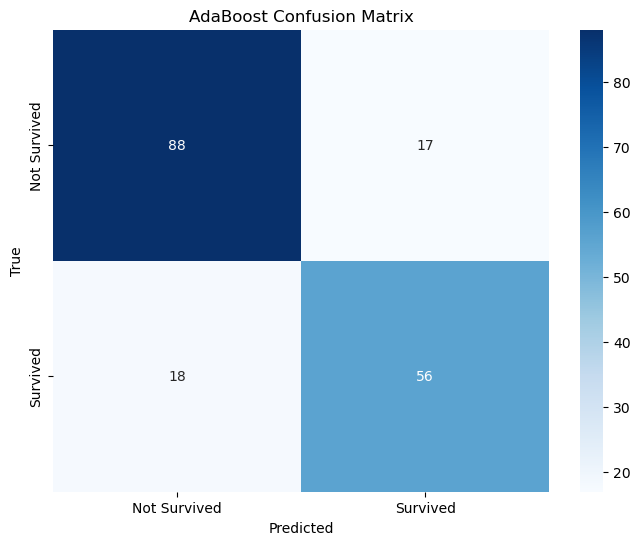

Classification Report:
              precision    recall  f1-score   support

           0     0.8302    0.8381    0.8341       105
           1     0.7671    0.7568    0.7619        74

    accuracy                         0.8045       179
   macro avg     0.7987    0.7974    0.7980       179
weighted avg     0.8041    0.8045    0.8043       179



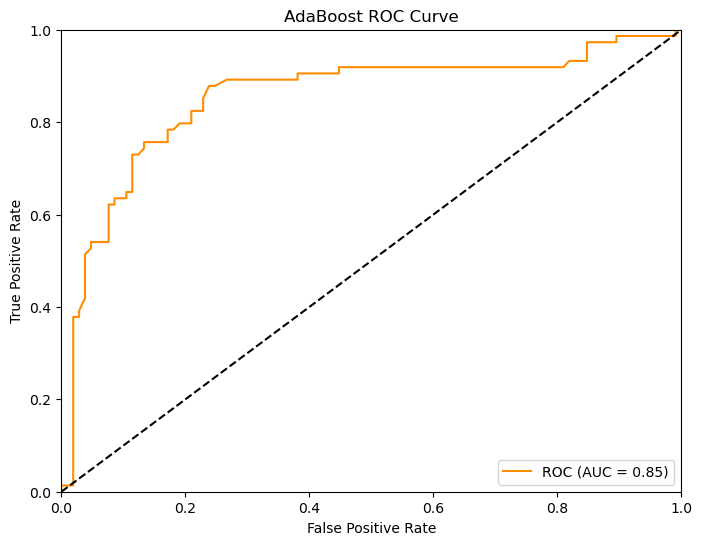

In [6]:
# 特征与目标列
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features].dropna()
y = df.loc[X.index, 'survived']  # 确保 y 与 X 对齐

# 划分训练验证集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 初始化 AdaBoost 模型
ada_clf = AdaBoostClassifier(
    random_state=42
)

# 训练模型
ada_clf.fit(X_train, y_train)

# 模型评估
y_probs = ada_clf.predict_proba(X_test)[:, 1]
y_pred = ada_clf.predict(X_test)

# 1. 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], 
            yticklabels=["Not Survived", "Survived"])
plt.title("AdaBoost Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. 分类报告
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 3. ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AdaBoost模型可视化

## export_text

**export_text**: 将训练好的决策树模型转换为可读的文本规则
- `decision_tree`: 训练好的决策树模型
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `max_depth`: 导出的最大深度
- `spacing`: 缩进空格数
- `decimals`: 数值的小数位数
- `show_weights`: 是否显示样本权重信息

In [7]:
from sklearn.tree import export_text

# 选择 AdaBoost 中的第 0 棵基学习器
estimator_0 = ada_clf.estimators_[0]

# 输出树的文本结构
tree_rules = export_text(estimator_0, feature_names=list(X.columns))
print(tree_rules)

|--- sex <= 0.50
|   |--- class: 1
|--- sex >  0.50
|   |--- class: 0



## plot_tree

**plot_tree**: 生成直观的决策树树形结构图
- `decision_tree`: 训练好的决策树模型
- `max_depth`: 显示的最大深度
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `label`: 节点信息显示内容
- `filled`: 是否填充颜色
- `impurity`: 是否显示不纯度
- `node_ids`: 是否显示节点ID
- `proportion`: 是否显示比例
- `rounded`: 是否圆角边框
- `precision`: 数值显示精度
- `fontsize`: 字体大小

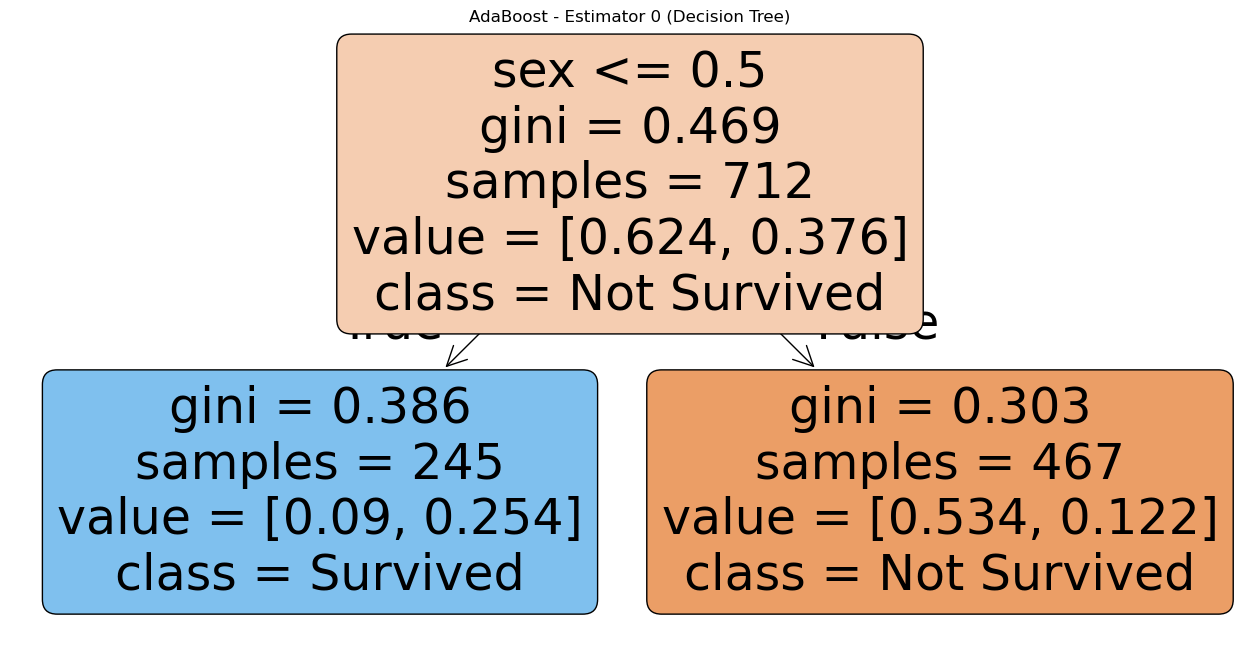

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 选择第一个基学习器（索引从 0 开始）
estimator_0 = ada_clf.estimators_[0]

# 可视化决策树结构
plt.figure(figsize=(16, 8))
plot_tree(estimator_0,
          feature_names=X.columns,
          class_names=["Not Survived", "Survived"],
          filled=True,
          rounded=True)
plt.title("AdaBoost - Estimator 0 (Decision Tree)")
plt.show()


# 特征重要度

**特征重要性(feature importance)**是AdaBoost模型中用于衡量各个特征对预测结果贡献程度的指标。
- 在 AdaBoost 中，模型是通过加权多个弱学习器（通常是决策树）组成的。
- 每棵树在训练过程中，会在某些特征上进行分裂，每次分裂都会带来模型性能的提升（如信息增益或 Gini 指数下降）。
- AdaBoost 会对每棵树分配一个权重（由其训练误差决定），因此一个特征在“重要的树”中频繁被使用，将拥有更高的最终重要性。
- 计算公式为：
$$\text{Importance}_j = \sum_{m=1}^{M} \alpha_m \cdot \sum_{t \in T_m} \Delta \text{Imp}_t \cdot \mathbb{1}(j \in t)$$
- 其中：
    - $M$：AdaBoost 中的弱学习器数量（即树的棵树数） 
    - $\alpha_m$：第$m$个学习器的权重
    - $T_m$：第$m$棵树中的所有非叶节点 
    - $\Delta \text{Imp}_t$：该节点分裂所带来的不纯度下降
    - $\mathbb{1}(j \in t)$：若节点$t$使用了特征$j$进行划分，则为 1，否则为 0 

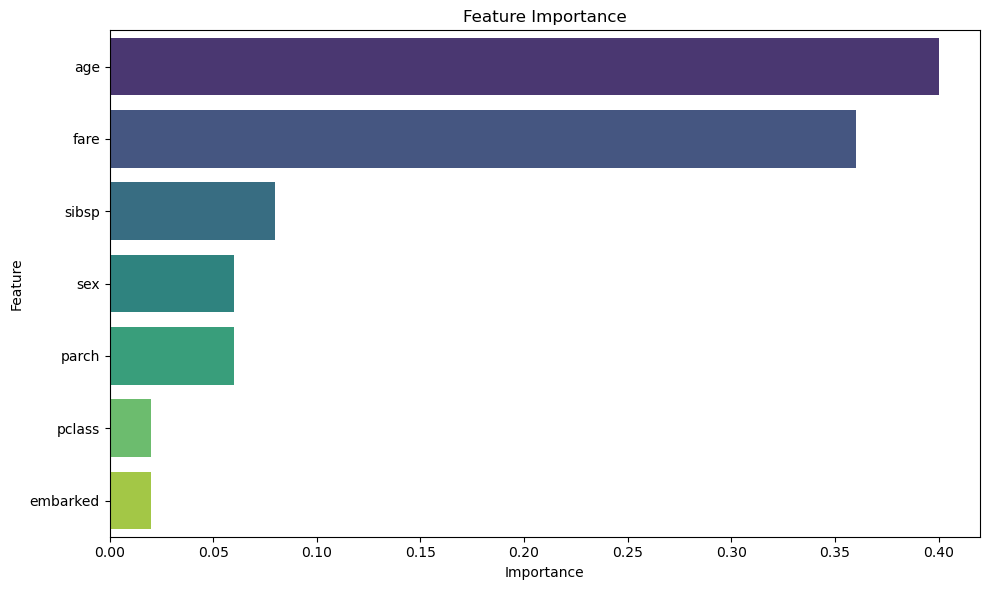

In [12]:
# 特征重要性
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': ada_clf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()